# Python programming for data science with pandas and related
*Jay Hineman*

## Outline
This notebook provides an *opinionated* and hopefully *succint* introduction to python programming scoped to data science activities. To this end, it is in no way exhaustive and we highly recommend the more complete discussions:
* **Data Science:** 
* **Python programming:** [Python Data Science Handbook](https://a.co/d/gVyo7tV)
* **Software architecture and engineering:** [Clean architecture: A Craftsman's Guide to Software Structure and Design](https://a.co/d/arW5A4a)

## Pandas TL;DR
### [Overview of Pandas](https://pandas.pydata.org/docs/getting_started/overview.html)
>pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, **real-world** data analysis in Python. Additionally, it has the broader goal of becoming **the most powerful and flexible open source data analysis/manipulation tool available in any language.** It is already well on its way toward this goal.

### Other (official) getting started resources
* [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#)
* [pandas cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook)

## 1 Minute Primer object oriented programming in Python for data science
* Python is a highly object oriented language -- everything is essentially an object even *numbers* and *functions* (compare this to traditional computational languages such as C/Fortran). *This has both advantages and disadvantages.*
* Python is multiparadigm and supports functional programming paradigms.
* Python is dynamically or duck-typed; *this again has both advantages and disadvantages*
* A pattern we will often use in data science, especially with python, is one where we have a data object/class and we use stateless functions to transform this data either creating a new data object/class. Core data objects/classes for this are pandas `DataFrame` and `Series` though they are not the only such data structures we would want to use in the python ecosystem.

## Basic data structures in pandas and their creation
The basic data structures in pandas are
* `Series` -- pandas column
* `DataFrame` -- pandas table

### Series creation
We provide and example creating a series object from other python data structures.

In [1]:
import numpy as np # standard idiom
import pandas as pd # standard idiom

x = np.random.rand(10)
y = [1,3,4, np.nan]
z = [{str(i): i} for i in range(6)] # danger/warning here 🐉 -- not numeric type

s_x = pd.Series(x)
s_y = pd.Series(y)
s_z = pd.Series(z)

In [4]:
x

[0.9643618  0.31456129 0.06605296 0.38747147 0.81916015 0.14203686
 0.217638   0.27512901 0.17454769 0.76106088]


In [3]:
s_x

0    0.964362
1    0.314561
2    0.066053
3    0.387471
4    0.819160
5    0.142037
6    0.217638
7    0.275129
8    0.174548
9    0.761061
dtype: float64

In [5]:
y

[1, 3, 4, nan]

In [6]:
s_y

0    1.0
1    3.0
2    4.0
3    NaN
dtype: float64

### DataFrame Creation with Yellow Cab Data
We do somehting less basic here and common with pandas. We table data in a common format on disk and read it into pandas. The table data in this case is [yellow_tripdata_2024-01.parquet](yellow_tripdata_2024-01.parquet) which is assumed to be downloaded already.

We will load this data and simultaneous create a pandas dataframe from it.

In [8]:
import pandas as pd
ytd_2024_01_df = pd.read_parquet(path="yellow_tripdata_2024-01.parquet")

In [10]:
# view the dataframe
ytd_2024_01_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


In [11]:
type(ytd_2024_01_df)

pandas.core.frame.DataFrame

## Viewing, selecting, and transforming data in DataFrame
Building on the last section we demonstrate how with yellow cab data:
* ... to view and select different parts of the data
* ... to create new objects from these views/selections
* ... to perform calculations either built in or user defined

### Different view and selections
* Let's mess with a series object created by selecting a single column
  - properties/attributes/methods of that object/class
  - making new objects from old
* Then do the same thing with multiple columns in the DataFrame
* See the documentation ([10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#) or [pandas cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook)) for more ideas.

In [32]:
# pull out single series
passengers = ytd_2024_01_df["passenger_count"]
print(type(passengers))
passengers

<class 'pandas.core.series.Series'>


0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2964619    NaN
2964620    NaN
2964621    NaN
2964622    NaN
2964623    NaN
Name: passenger_count, Length: 2964624, dtype: float64

In [17]:
# properties on series object
passengers.size

2964624

In [18]:
# methods on a series
passengers.mean()

np.float64(1.3392808966805005)

In [23]:
# five number
passengers.describe()

count    2.824462e+06
mean     1.339281e+00
std      8.502817e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [27]:
# some formatting and printing
passengers_dict = dict(passengers.describe()) # make a dictionary (standard python object)
print(passengers_dict)
# format and print
print("min: {min}, mean: {mean}, max: {max}".format(**passengers_dict)) # "unpack dict as keyward args for format method

{'count': np.float64(2824462.0), 'mean': np.float64(1.3392808966805005), 'std': np.float64(0.8502816924590749), 'min': np.float64(0.0), '25%': np.float64(1.0), '50%': np.float64(1.0), '75%': np.float64(1.0), 'max': np.float64(9.0)}
min: 0.0, mean: 1.3392808966805005, max: 9.0


In [33]:
# making dataframe from a dataframe
count_vs_fare = ytd_2024_01_df[["passenger_count", "fare_amount"]].dropna()
print(f"type: {type(count_vs_fare)}")
count_vs_fare

type: <class 'pandas.core.frame.DataFrame'>


,passenger_count,fare_amount
0,1.0,17.7
1,1.0,10.0
2,1.0,23.3
3,1.0,10.0
4,1.0,7.9
...,...,...
2824457,1.0,16.3
2824458,1.0,18.4
2824459,3.0,17.7
2824460,0.0,5.1


In [34]:
count_vs_fare.describe()

,passenger_count,fare_amount
count,2.824462e+06,2.824462e+06
mean,1.339281e+00,1.808370e+01
std,8.502817e-01,1.919273e+01
min,0.000000e+00,-8.990000e+02
25%,1.000000e+00,8.600000e+00
50%,1.000000e+00,1.280000e+01
75%,1.000000e+00,1.980000e+01
max,9.000000e+00,5.000000e+03


### Make a new cleaned data frame which we can analyze and visualize

In [35]:
ytd_2024_01_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


In [36]:
ytd_2024_01_df.keys()

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [51]:
time_distance_df = ytd_2024_01_df[["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance"]].dropna()
time_distance_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.72
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.80
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,4.70
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.40
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,0.80
...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,3.18
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,4.00
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,3.33
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,3.06


In [52]:
time_distance_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance
count,2.964624e+06,2964624,2964624,2.964624e+06
mean,1.754204e+00,2024-01-17 00:46:36.431092,2024-01-17 01:02:13.208130,3.652169e+00
min,1.000000e+00,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000000e+00
25%,2.000000e+00,2024-01-09 15:59:19.750000,2024-01-09 16:16:23,1.000000e+00
50%,2.000000e+00,2024-01-17 10:45:37.500000,2024-01-17 11:03:51.500000,1.680000e+00
75%,2.000000e+00,2024-01-24 18:23:52.250000,2024-01-24 18:40:29,3.110000e+00
max,6.000000e+00,2024-02-01 00:01:15,2024-02-02 13:56:52,3.127223e+05
std,4.325902e-01,NaN,NaN,2.254626e+02


In [53]:
time_distance_df.max() # maybe we should clean some more 😬

VendorID                                   6
tpep_pickup_datetime     2024-02-01 00:01:15
tpep_dropoff_datetime    2024-02-02 13:56:52
trip_distance                       312722.3
dtype: object

In [56]:
# make it a little better
time_distance_df = time_distance_df[time_distance_df["trip_distance"] < 100]
time_distance_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.72
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.80
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,4.70
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.40
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,0.80
...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,3.18
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,4.00
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,3.33
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,3.06


In [57]:
time_distance_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance
count,2.964565e+06,2964565,2964565,2.964565e+06
mean,1.754201e+00,2024-01-17 00:46:36.647364,2024-01-17 01:02:13.341002,3.226369e+00
min,1.000000e+00,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000000e+00
25%,2.000000e+00,2024-01-09 15:59:18,2024-01-09 16:16:21,1.000000e+00
50%,2.000000e+00,2024-01-17 10:45:39,2024-01-17 11:03:52,1.680000e+00
75%,2.000000e+00,2024-01-24 18:23:53,2024-01-24 18:40:30,3.110000e+00
max,6.000000e+00,2024-02-01 00:01:15,2024-02-02 13:56:52,9.900000e+01
std,4.325921e-01,NaN,NaN,4.365246e+00


In [59]:
time_distance_df[["VendorID"]].value_counts()

VendorID
2           2234578
1            729727
6               260
Name: count, dtype: int64

In [64]:
time_distance_df[time_distance_df["VendorID"] == 6].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance
count,260.0,260,260,260.000000
mean,6.0,2024-01-12 00:04:02.115384,2024-01-12 00:44:36.603846,11.346846
min,6.0,2024-01-01 02:01:50,2024-01-01 02:01:39,0.340000
25%,6.0,2024-01-08 13:46:42.250000,2024-01-08 14:31:36.750000,6.585000
50%,6.0,2024-01-11 15:01:47,2024-01-11 16:01:39.500000,11.220000
75%,6.0,2024-01-17 06:01:30.500000,2024-01-17 07:01:26.750000,15.692500
max,6.0,2024-01-23 16:01:32,2024-01-23 16:01:34,29.480000
std,0.0,NaN,NaN,6.172304


In [67]:
# date-time information is good example a non-numerical type
time_distance_df["tpep_pickup_datetime"]

0         2024-01-01 00:57:55
1         2024-01-01 00:03:00
2         2024-01-01 00:17:06
3         2024-01-01 00:36:38
4         2024-01-01 00:46:51
                  ...        
2964619   2024-01-31 23:45:59
2964620   2024-01-31 23:13:07
2964621   2024-01-31 23:19:00
2964622   2024-01-31 23:07:23
2964623   2024-01-31 23:58:25
Name: tpep_pickup_datetime, Length: 2964565, dtype: datetime64[us]

In [74]:
# Objects can have operations and this is helpful!
print(time_distance_df["tpep_dropoff_datetime"] - time_distance_df["tpep_pickup_datetime"])
(time_distance_df["tpep_dropoff_datetime"] - time_distance_df["tpep_pickup_datetime"]).describe()

0         0 days 00:19:48
1         0 days 00:06:36
2         0 days 00:17:55
3         0 days 00:08:18
4         0 days 00:06:06
                ...      
2964619   0 days 00:08:37
2964620   0 days 00:14:45
2964621   0 days 00:19:00
2964622   0 days 00:17:51
2964623   0 days 00:15:05
Length: 2964565, dtype: timedelta64[us]


count                   2964565
mean     0 days 00:15:36.693638
std      0 days 00:34:50.921442
min           -1 days +23:46:26
25%             0 days 00:07:09
50%             0 days 00:11:38
75%             0 days 00:18:41
max             6 days 13:35:24
dtype: object

In [86]:
# let's add this information as column in our data frame
time_deltas = time_distance_df["tpep_dropoff_datetime"] - time_distance_df["tpep_pickup_datetime"]
time_distance_df["time_deltas"] = time_deltas
time_distance_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,time_deltas
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.72,0 days 00:19:48
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.80,0 days 00:06:36
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,4.70,0 days 00:17:55
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.40,0 days 00:08:18
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,0.80,0 days 00:06:06
...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,3.18,0 days 00:08:37
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,4.00,0 days 00:14:45
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,3.33,0 days 00:19:00
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,3.06,0 days 00:17:51


## Plotting
Let's try to plot without any further fix up.

<Axes: >

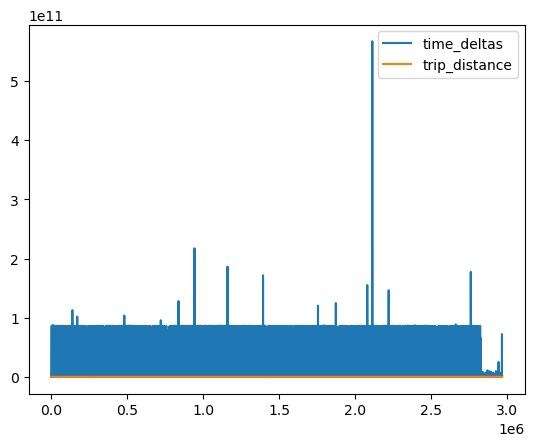

In [95]:
# what's this plot method do?
time_distance_df[["time_deltas", "trip_distance"]].plot()

DTypePromotionError: The DType <class 'numpy.dtypes.TimeDelta64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>)

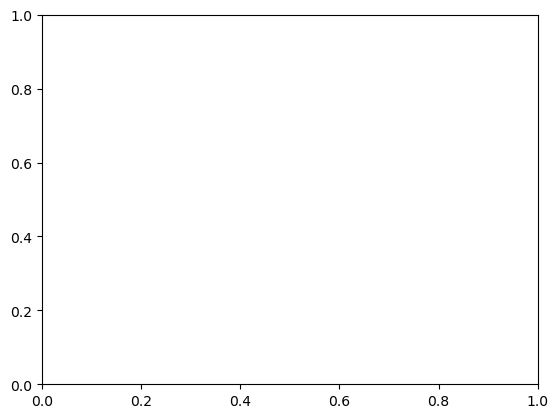

In [93]:
# a scatter plot would be nice
time_distance_df[["time_deltas", "trip_distance"]].plot.scatter(x="time_deltas", y="trip_distance")

### Messing with stuff more
So our time column is not the correct type, we something numerical to plot. Let's fix it up in a number of ways and explain some of other concepts along the way.

### Strategies
1. Make numeric version of the column in the data object then use the scatter method
2. Pass the data to plotting functions

### Documentation
https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html#pandas.to_numeric

In [99]:
time_distance_df["time_deltas"]

0         0 days 00:19:48
1         0 days 00:06:36
2         0 days 00:17:55
3         0 days 00:08:18
4         0 days 00:06:06
                ...      
2964619   0 days 00:08:37
2964620   0 days 00:14:45
2964621   0 days 00:19:00
2964622   0 days 00:17:51
2964623   0 days 00:15:05
Name: time_deltas, Length: 2964565, dtype: timedelta64[us]

In [105]:
time_distance_df["time_mins"] = pd.to_numeric(time_distance_df["time_deltas"]) / 6**10
time_distance_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,time_deltas,time_mins
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.72,0 days 00:19:48,19.647348
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.80,0 days 00:06:36,6.549116
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,4.70,0 days 00:17:55,17.778535
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.40,0 days 00:08:18,8.236010
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,0.80,0 days 00:06:06,6.052971
...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,3.18,0 days 00:08:37,8.550235
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,4.00,0 days 00:14:45,14.636282
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,3.33,0 days 00:19:00,18.853516
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,3.06,0 days 00:17:51,17.712382


<Axes: xlabel='time_mins', ylabel='trip_distance'>

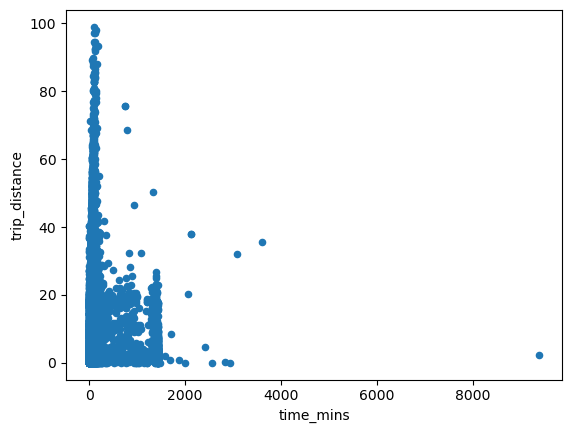

In [108]:
time_distance_df[["time_mins", "trip_distance"]].plot.scatter(x="time_mins", y="trip_distance")

In [ ]:
# Exercise: make a python function to do this